# Linear Regression

🎯 In this exercise, you will model the sale price of houses (`SalePrice`) according to their living areas (`GrLivArea`) 

👇 Load the `houses.csv` dataset into this notebook as a pandas dataframe, and display its first 5 rows.

<details>
    <summary>💡 Hint</summary>
    The dataset is located in a parent directory, you should use <code>../</code> in order to find it.
</details>

In [14]:
import pandas as pd

df = pd.read_csv('../data/houses.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1756,118,20,RL,74.0,8536,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2007,New,Partial,155000
1757,253,60,RL,65.0,8366,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,173000
1758,199,75,RM,92.0,5520,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2009,WD,Abnorml,104000


ℹ️ You can download a detailed description of the dataset [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset_description.txt). Make sure to refer to it throughout the day.

## 1. Define the feature set and target

🎯 The objective is to model the sale price of houses in \$ (`SalePrice`) according to their living areas in $ft^2$ (`GrLivArea`).

👇 Assign those two variables to X and y. Remember that X is the feature(s), and y the target.

In [18]:
X = df[['GrLivArea']]
y = df['SalePrice']

👇 In a scatter plot ([doc](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.scatter.html)) , visualize the relationship between the living areas and the sale prices.

Text(0, 0.5, 'Price')

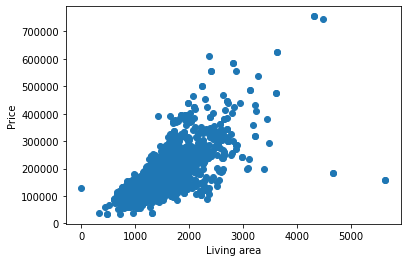

In [19]:
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.xlabel('Living area')
plt.ylabel('Price')

ℹ️ The scatter plot should hint at the somewhat linear relationship.

### ☑️ Test your code

In [20]:
from nbresult import ChallengeResult

result = ChallengeResult('variables',
                         variable_X = round(X.mean()).item(),
                         variable_y = round(y.mean())
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.8.10, pytest-7.1.2, pluggy-1.0.0 -- /bin/python3
cachedir: .pytest_cache
rootdir: /home/quantium/labs/lewagon/data-challenges/05-ML/01-Fundamentals-of-Machine-Learning/01-Linear-Regression/tests
plugins: dash-1.19.0, anyio-3.6.1
collecting ... collected 2 items

test_variables.py::TestVariables::test_variable_X PASSED                 [ 50%]
test_variables.py::TestVariables::test_variable_y PASSED                 [100%]

============================== 2 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/variables.pickle

git commit -m 'Completed variables step'

git push origin master



## 2. Cross-validation

👇 Using Sklearn's `cross_validate` ([doc](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html)), run a 5-fold cross validation on a `LinearRegression` ([doc](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)) model predicting sale price from living area. Save the raw output of the cross validation under a new variable `cv_results`.

In [21]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

model = LinearRegression()
cv_results = cross_validate(model, X, y, cv=5)
cv_results

❓ What is the lowest score of the cross validation? Compute your answer and save the value under new variable `min_score`.

In [22]:
min_score = cv_results['test_score'].min()
min_score

{'fit_time': array([0.00966311, 0.00200796, 0.00217748, 0.00267935, 0.00188017]),
 'score_time': array([0.00192571, 0.00129819, 0.00106192, 0.00117898, 0.00137401]),
 'test_score': array([0.55810657, 0.52593307, 0.50430916, 0.3911751 , 0.45203221])}

❓ What is the highest score of the cross validation?  Compute your answer and save the value under new variable `max_score`.

In [23]:
max_score = cv_results['test_score'].max()
max_score

0.3911751008901019

❓ What is the mean score of the cross validation? Compute your answer and save the value under new variable `mean_score`.

In [25]:
mean_score = cv_results['test_score'].mean()
mean_score

0.4863112208425962

ℹ️ When running a cross-validation, we always look at the mean score as the most robust and representative evaluation of the model's performance.

### ☑️ Test your code

In [26]:
from nbresult import ChallengeResult

result = ChallengeResult('cv_results',
                         cv_result = cv_results,
                         min_score = min_score,
                         max_score = max_score,
                         mean_score = mean_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.8.10, pytest-7.1.2, pluggy-1.0.0 -- /bin/python3
cachedir: .pytest_cache
rootdir: /home/quantium/labs/lewagon/data-challenges/05-ML/01-Fundamentals-of-Machine-Learning/01-Linear-Regression/tests
plugins: dash-1.19.0, anyio-3.6.1
collecting ... collected 4 items

test_cv_results.py::TestCvResults::test_cv_max PASSED                    [ 25%]
test_cv_results.py::TestCvResults::test_cv_mean PASSED                   [ 50%]
test_cv_results.py::TestCvResults::test_cv_min PASSED                    [ 75%]
test_cv_results.py::TestCvResults::test_cv_results PASSED                [100%]

============================== 4 passed in 0.15s ===============================


💯 You can commit your code:

git add tests/cv_results.pickle

git commit -m 'Completed cv_results step'

git push origin master



👇 Plot the evolution of **total computational time** and **mean score** as K folds increases from 2 until 40.

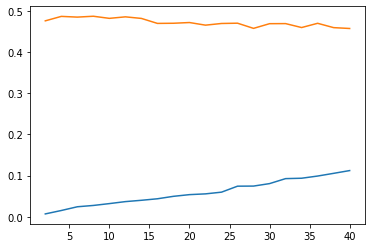

In [28]:
import numpy as np

K = np.arange(2, 42, 2)

fit_times = np.array([ cross_validate(model, X, y, cv=i)['fit_time'].sum() for i in K ])
score_times = np.array([ cross_validate(model, X, y, cv=i)['score_time'].sum() for i in K])
total_times = fit_times + score_times
mean_scores = [ cross_validate(model, X, y, cv=i)['test_score'].mean() for i in K ]

plt.plot(K, total_times)
plt.plot(K, mean_scores);

ℹ️ You will notice that while the score stabilizes, the computational time keeps increasing. For that reason, we do not exceed K = 10 as a rule of thumb.

## 3. Train the model

Cross validation does not train a model, it evaluates a hypothetical model on the dataset. If you want to use the model to, for example, make predictions, you will need to train it outside of the cross validation. 

👇 Go ahead and train the model. Save the trained model under the variable `model`.

In [39]:
model = model.fit(X.values, y)

❓ What is the slope of your trained model? It can be accessed via the model's attributes. Save the slope under variable name `slope`.

In [40]:
slope = model.coef_ 
slope

array([105.00927564])

❓ What is the intercept of your trained model? It can be accessed via the model's attributes. Save the intercept under variable name `intercept`.

In [41]:
intercept = model.intercept_ 
intercept

22104.12101002081

### ☑️ Test your code

In [33]:
from nbresult import ChallengeResult

result = ChallengeResult('trained_model',
                         model = model,
                         slope = slope,
                         intercept = intercept
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.8.10, pytest-7.1.2, pluggy-1.0.0 -- /bin/python3
cachedir: .pytest_cache
rootdir: /home/quantium/labs/lewagon/data-challenges/05-ML/01-Fundamentals-of-Machine-Learning/01-Linear-Regression/tests
plugins: dash-1.19.0, anyio-3.6.1
collecting ... collected 2 items

test_trained_model.py::TestTrainedModel::test_intercept PASSED           [ 50%]
test_trained_model.py::TestTrainedModel::test_slope PASSED               [100%]

============================== 2 passed in 0.73s ===============================


💯 You can commit your code:

git add tests/trained_model.pickle

git commit -m 'Completed trained_model step'

git push origin master



## 4. Visualize the model

👇 With matplotlib: 
- Define the line of best fit equation (using the slope and intercept values)
- Plot it in a graph over the scattered data points

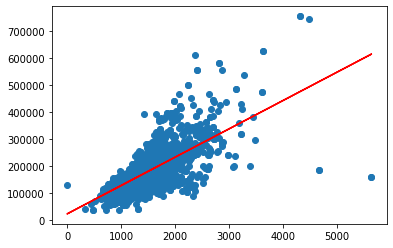

In [34]:
plt.plot(X, intercept+X*slope, color='red')
plt.scatter(X, y);

# 5. Predict

👇 Use your trained model to predict the sale price of a house with a living area of 1500 square feet. Save the predicted price as variable name `prediction`.

In [42]:
prediction = model.predict([[1500]])
prediction

array([179618.0344634])

### ☑️ Test your code

In [43]:
from nbresult import ChallengeResult

result = ChallengeResult('prediction',
                         prediction = prediction
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.8.10, pytest-7.1.2, pluggy-1.0.0 -- /bin/python3
cachedir: .pytest_cache
rootdir: /home/quantium/labs/lewagon/data-challenges/05-ML/01-Fundamentals-of-Machine-Learning/01-Linear-Regression/tests
plugins: dash-1.19.0, anyio-3.6.1
collecting ... collected 1 item

test_prediction.py::TestPrediction::test_prediction PASSED               [100%]

============================== 1 passed in 0.16s ===============================


💯 You can commit your code:

git add tests/prediction.pickle

git commit -m 'Completed prediction step'

git push origin master



# 🏁